The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Initializing Database...

Updating Tickers...
[INFO] VGWE.DE: No data found. Downloading from 2020-01-01...
[INFO] Saved 1405 records to database.
[INFO] EUNL.DE: No data found. Downloading from 2020-01-01...
[INFO] Saved 1510 records to database.
[INFO] SXR8.DE: No data found. Downloading from 2020-01-01...
[INFO] Saved 1510 records to database.
[INFO] VWCE.DE: No data found. Downloading from 2020-01-01...
[INFO] Saved 1510 records to database.

Retrieving Data...
symbol         EUNL.DE     SXR8.DE    VGWE.DE     VWCE.DE
date                                                     
2025-11-26  111.114998  629.780029  77.489998  144.419998
2025-11-27  111.000000  629.020020  77.790001  144.259995
2025-11-28  111.464996  631.400024  77.919998  144.839996
2025-12-01  111.010002  628.820007  77.639999  144.300003
2025-12-02  111.084999  628.719971  77.690002  144.259995


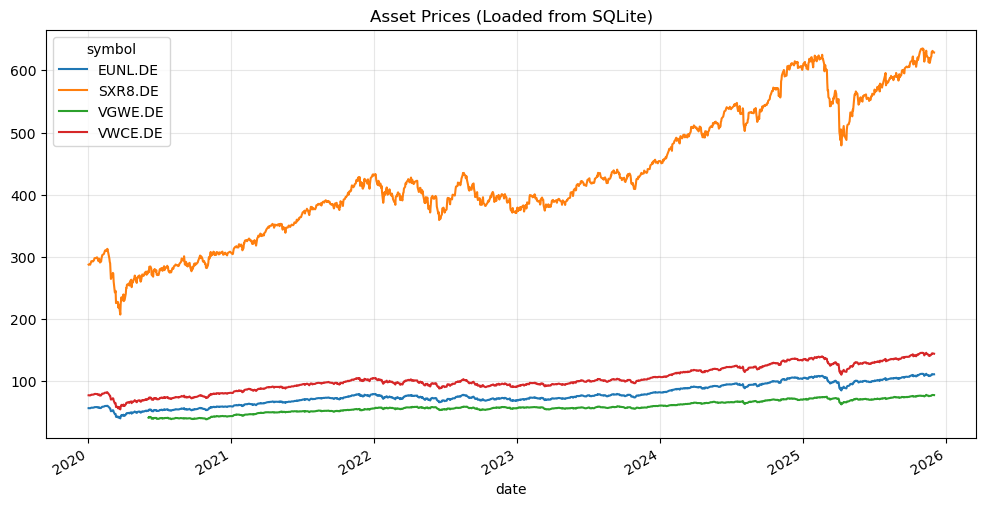

In [3]:
import sys
import os
import matplotlib.pyplot as plt

# --- Magic Command to reload modules automatically ---
# This means if you change code in src/database.py, you don't need to restart the kernel
%load_ext autoreload
%autoreload 2

# --- Path Setup ---
# We need to tell Python where 'src' is (one level up)
sys.path.append(os.path.abspath('..'))

from src.database import MarketDB

# 1. Initialize DB
print("Initializing Database...")
db = MarketDB()

# 2. Define Assets (Using your ETFs + Nvidia/Apple for volatility)
tickers = ["VGWE.DE", "EUNL.DE", "SXR8.DE", "VWCE.DE"]

# 3. Update Data (Downloads from Yahoo)
print("\nUpdating Tickers...")
db.update_tickers(tickers, start_date="2020-01-01")

# 4. Load Data
print("\nRetrieving Data...")
df = db.get_prices(tickers)
print(df.tail())

# 5. Plot
df.plot(figsize=(12, 6), title="Asset Prices (Loaded from SQLite)")
plt.grid(True, alpha=0.3)
plt.show()